In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Attribute Information:

1)	FRESH: annual spending (m.u.) on fresh products (Continuous);

2)	MILK: annual spending (m.u.) on milk products (Continuous); 

3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 

4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 

5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 

6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 

7)	CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) 

8)	REGION: customers Region - Lisnon, Oporto or Other (Nominal) 
 

In [2]:
location = r'E:\Python\Machine Learning\datasets\Wholesale-customers-data.csv'

In [3]:
# Import .csv file and convert it to a DataFrame object
df = pd.read_csv(location);

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


In [4]:
df.iloc[20:32, :]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
20,2,3,17546,4519,4602,1066,2259,2124
21,1,3,5567,871,2010,3383,375,569
22,1,3,31276,1917,4469,9408,2381,4334
23,2,3,26373,36423,22019,5154,4337,16523
24,2,3,22647,9776,13792,2915,4482,5778
25,2,3,16165,4230,7595,201,4003,57
26,1,3,9898,961,2861,3151,242,833
27,1,3,14276,803,3045,485,100,518
28,2,3,4113,20484,25957,1158,8604,5206
29,1,3,43088,2100,2609,1200,1107,823


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


 there is no missing value in the dataset and all the data is integer in type

In [6]:
print(df.describe())

          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.

most of the data in this dataset is continuous in nature except for two features: Channel and Region. So for easing your computations, you will drop these two:

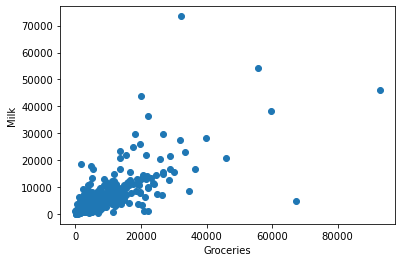

In [7]:
# Let's plot the data now
x = df['Grocery']
y = df['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")
plt.ylabel("Milk")
plt.show()

In [8]:
df.drop(["Channel", "Region"], axis = 1, inplace = True)

Because the values of the data are in the thousands, you are going to normalize each attribute by scaling it to 0 mean and unit variance. 

In [9]:
df1 = df[["Grocery", "Milk"]].copy()
##df = df.values()
#df = df.as_matrix().astype("float32", copy = False)

In [10]:
df1.head()

,Grocery,Milk
0,7561,9656
1,9568,9810
2,7684,8808
3,4221,1196
4,7198,5410


In [11]:
stscaler = StandardScaler().fit(df1)
df1 = stscaler.transform(df1)

In [12]:
df.iloc[23,:]

Fresh               26373
Milk                36423
Grocery             22019
Frozen               5154
Detergents_Paper     4337
Delicassen          16523
Name: 23, dtype: int64

In [13]:
df1[23]

array([1.48200513, 4.15447557])

construct a DBSCAN object that requires a minimum of 15 data points in a neighborhood of radius 0.5 to be considered a core point

In [14]:
dbsc = DBSCAN(eps = .5, min_samples = 10).fit(df1)

In [15]:
df1[20:25,]

array([[-0.35283935, -0.17325941],
       [-0.62590112, -0.66810574],
       [-0.36685062, -0.52621724],
       [ 1.48200513,  4.15447557],
       [ 0.61530791,  0.53984561]])

In [16]:
df['LAB']=dbsc.labels_

In [17]:
df['LAB'].unique()

array([ 0, -1], dtype=int64)

In [18]:
df[df['LAB']== -1].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,LAB
23,26373,36423,22019,5154,4337,16523,-1
28,4113,20484,25957,1158,8604,5206,-1
45,5181,22044,21531,1740,7353,4985,-1
47,44466,54259,55571,7782,24171,6465,-1
49,4967,21412,28921,1798,13583,1163,-1


In [19]:
df[df['LAB']== 0].head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,LAB
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0


In [20]:
dbsc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [21]:
# extract our cluster labels and outliers to plot our results.

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [22]:
core_samples

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,